# 1.	Given an n-gram word:
    - How many <a> symbols do we need to prefix a sentence?
        You can use either n symbols or more commonly n-1 symbols.
    - How many </a> symbols do we need to suffix a sentence?
        Only one end symbol is needed

# 2.	Why do you need to use log-probabilities instead of actual probabilities?  
    Avoids underflow and is computationally faster. Using log allows you to add log probablities instead of multiplying actual probabilities to log at the end. Avoids rounding errors from multiplication

Some people have suggested using log-probabilities directly in the perplexity formula. What’s the formula if you use log-base-2 probabilities?

Perplexity = $2^{entropy}$

Perplexity = 2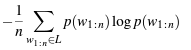

Equation from Chapter 3

# 3.	What’s Add-k smoothing?
    Pretend to see each word k more times than originally. Prevent 0 probabilities.

# 4.	Exercises 3.5, 3.7, 3.12

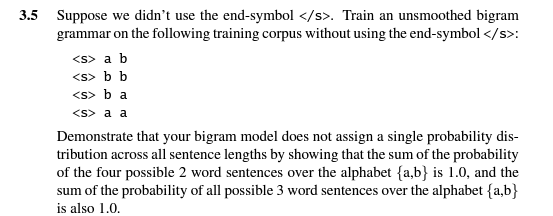

In [7]:
corpus = "<s> a b <s> b b <s> b a <s> a a"
def bigram_model(corpus):
    sentences = corpus.split("<s>")
    bigram_counts = {}
    start_counts = {}

    
    for sentence in sentences:
        # Clean up and split each sentence into words
        words = sentence.strip().split()
        if not words:
            continue
        
        if words[0] in start_counts:
            start_counts[words[0]] += 1
        else:
            start_counts[words[0]] = 1
            
        for i in range(len(words) - 1):
            bigram = (words[i], words[i + 1])
            if bigram in bigram_counts:
                bigram_counts[bigram] += 1
            else:
                bigram_counts[bigram] = 1
                
            if words[i + 1] in start_counts:
                start_counts[words[i + 1]] += 1
            else:
                start_counts[words[i + 1]] = 1
                
    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        first_word = bigram[0]
        bigram_probabilities[bigram] = count / start_counts[first_word]
        
    return bigram_counts, bigram_probabilities

bigram_counts, bigram_probabilities = bigram_model(corpus)
print("Bigram Counts:", bigram_counts)
print("Bigram Probabilities:", bigram_probabilities)

Bigram Counts: {('a', 'b'): 1, ('b', 'b'): 1, ('b', 'a'): 1, ('a', 'a'): 1}
Bigram Probabilities: {('a', 'b'): 0.25, ('b', 'b'): 0.25, ('b', 'a'): 0.25, ('a', 'a'): 0.25}


In [15]:
def bigram_three_word(bigram_probabilities, corpus):
    words = set(corpus.replace('<s>', '').split())
    
    three_word_probs = {}
    
    for first in words:
        for second in words:
            for third in words:
            
                if (first, second) in bigram_probabilities and (second, third) in bigram_probabilities:
                    prob = 2 * bigram_probabilities[(first, second)] * bigram_probabilities[(second, third)]
                    three_word_probs[(first, second, third)] = prob
    
    return three_word_probs

# Calculate three-word sequence probabilities
three_word_probs = bigram_three_word(bigram_probabilities, corpus)
print("Three-word Sequence Probabilities:", three_word_probs)

Three-word Sequence Probabilities: {('a', 'a', 'a'): 0.125, ('a', 'a', 'b'): 0.125, ('a', 'b', 'a'): 0.125, ('a', 'b', 'b'): 0.125, ('b', 'a', 'a'): 0.125, ('b', 'a', 'b'): 0.125, ('b', 'b', 'a'): 0.125, ('b', 'b', 'b'): 0.125}


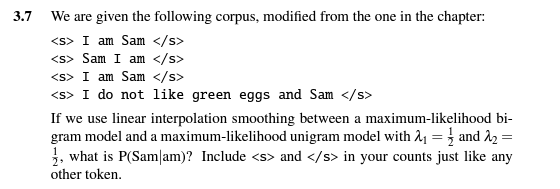

**Unigram Counts**\
I: 4\
am: 3\
Sam: 4\
\<s>: 4 \
\</s>: 4\
do: 1\
not: 1\
like: 1\
green: 1\
eggs: 1\
and: 1
 
**Bigram Counts**\
(\<s>, I): 3\
(I, am): 3\
(am, Sam): 2\
(Sam, \</s>): 2\
(\<s>, Sam): 1\
(Sam, I): 1\
(I, do): 1\
(do, not): 1\
(not, like): 1\
(like, green): 1\
(green, eggs): 1\
(eggs, and): 1\
(and, Sam): 1\
(Sam, \</s>): 1

Unigram - P(Sam) = 4/25 = 0.16\
Bigram - P(Sam|am) = 2/3 = 0.66

(1/2)*0.16+(!/2)*.66 = **0.41**

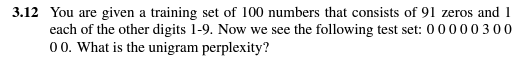

P(0) = 0.91

P(n!=0) = 0.9

P($M_{i}$) = 0.1; where M = {1,2,....,9}, and *i* is the ith element in N

Test set size = 10

P(0....0123456789) = $2^{-(1/10)(9*log_2(0.91)+log_2(.01)}$
= $2^{0.78684}$
**=1.72529**

# 5.	Given the corpus of Shakespeare from nltk (nltk.corpus.gutenberg.fileids()), you will.

    - Parse the documents
    
    - Break documents into sentences
    
    - Perform tokenization of the documents
    
    - Use L = 5,000, and any other word outside the most common 5,000 words will be replaced by <UNK>  (if L == 5,000 does not work, increase L)
    
        i. You will separate 10% of the sentences as test sentences from your set of sentences
    
        ii.	Compute the average length of the sentence of the test set. If we choose words at random from L, what’s the perplexity?
    
    - Compute unigrams, bigrams, trigrams for the document
    
        i.	Which word has the largest unigram count?
    
        ii.	Which bigram has the largest bigram count?
    
        iii. Which trigram has the largest trigram count?
    
    - You will use Laplace smoothing to compute trigram probabilities
    
    - Compute the perplexity of the test set using the unigram, bigram and trigram model
 
    - Generate synthetic texts using unigrams, bigrams and trigrams. For bigram (u, v), sample word v from V using probability P(v | u). Use the method of bag of words for <UNK> words (store a bag of them without caring for probability)
    
        i.	Compute the perplexity of 100 sentences generated randomly from the probability distributions and average the perplexity for the 100 sentences for unigrams, bigrams and trigrams. Present the perplexity result and the average sentence size.



The following is a code snipet that shows how you can generate text based on a probability distribution.

In [2]:
import numpy as np

vocab = 'A B C D E F G'.split()

In [3]:
vocab

['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [4]:
# Assume each char has a probability
p = [0.3, 0.2, 0.1, 0.05, 0.03, 0.2, 0.12]
sum(p)

1.0

In [18]:
# Generates 5 sentences of length 10
np.array(vocab)[np.random.choice(len(vocab), replace=True, p=p, size=(5, 10))]

array([['F', 'B', 'A', 'A', 'F', 'F', 'A', 'F', 'A', 'G'],
       ['A', 'B', 'B', 'F', 'D', 'A', 'A', 'B', 'F', 'A'],
       ['B', 'B', 'A', 'G', 'F', 'F', 'B', 'F', 'F', 'D'],
       ['E', 'A', 'B', 'B', 'A', 'B', 'F', 'E', 'A', 'A'],
       ['A', 'A', 'A', 'F', 'B', 'F', 'B', 'G', 'B', 'G']], dtype='<U1')

In [25]:
# vocab has unknown token (OOV)
vocab = { 'A': 0.5, 'B': 0.3, '<UNK>': 0.2}
p = list(vocab.values())
i2s = list(vocab.keys())
# if we select randomly unknown token, we can sample from uniform distribution
unknown_index = 2
unk = [ 'C', 'D', 'E' ]

def generate(size):
    s = ''
    for _ in range(size):
        # sample from vocabulary
        index = np.random.choice(len(vocab), p=p)
        # if sample is unknown token
        if index == unknown_index:
            # resample unknown dictionary
            c = unk[np.random.randint(len(unk))]
        else:
            c = i2s[index]
        s += c
    return s

generate(30)

'BAABACEABAEDBAEABBAAABABEBBABC'

In [19]:
import nltk

from nltk.corpus import *
import string
import numpy as np
from collections import Counter

In [4]:
nltk.download('gutenberg')
nltk.download('punkt')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [129]:
sentences = gutenberg.sents()
#print(sentences)
L = 5000
all_words = [word for sentence in sentences for word in sentence]
#for sentence in sentences:
    #all_words.extend(sentence)
        
word_freq = Counter(all_words)
#save most common words
common_words = set(word for word, freq in word_freq.most_common(L))
#save uncommonm words for the bag of words for UNK later
uncommon_words = set()
processed_sentences = []
for sentence in sentences:
    #processed_sentence = [word if word in common_words else '<UNK>' for word in sentence]
    #processed_sentences.append(processed_sentence)
    processed_sentence = []
    for word in sentence:
        if word in common_words:
            processed_sentence.append(word)
        else:
            processed_sentence.append('<UNK>')
            uncommon_words.add(word)  # Add uncommon word to the set
    processed_sentences.append(processed_sentence)

In [51]:
print(processed_sentences[:L])
processed_sentences = processed_sentences[:L]

[['[', 'Emma', 'by', 'Jane', '<UNK>', '<UNK>', ']'], ['<UNK>', 'I'], ['CHAPTER', 'I'], ['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', '<UNK>', 'some', 'of', 'the', 'best', '<UNK>', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', '<UNK>', 'her', '.'], ['She', 'was', 'the', 'youngest', 'of', 'the', 'two', 'daughters', 'of', 'a', 'most', 'affectionate', ',', '<UNK>', 'father', ';', 'and', 'had', ',', 'in', 'consequence', 'of', 'her', 'sister', "'", 's', 'marriage', ',', 'been', 'mistress', 'of', 'his', 'house', 'from', 'a', 'very', 'early', 'period', '.'], ['Her', 'mother', 'had', 'died', 'too', 'long', 'ago', 'for', 'her', 'to', 'have', 'more', 'than', 'an', '<UNK>', 'remembrance', 'of', 'her', '<UNK>', ';', 'and', 'her', 'place', 'had', 'been', 'supplied', 'b

In [52]:
test_size = int(len(processed_sentences) * 0.1)
test_sentences = processed_sentences[-test_size:]
print(test_sentences)

[['And', 'I', 'should', 'never', 'have', 'expected', 'you', 'to', 'be', '<UNK>', 'your', '<UNK>', 'to', 'such', 'vanity', '-', '<UNK>', 'for', 'poor', 'young', 'ladies', '."'], ['"', 'My', 'dear', ',', 'you', 'do', 'not', 'understand', 'me', '.'], ['This', 'is', 'a', 'matter', 'of', 'mere', 'common', 'politeness', 'and', 'good', '-', '<UNK>', ',', 'and', 'has', 'nothing', 'to', 'do', 'with', 'any', 'encouragement', 'to', 'people', 'to', 'marry', '."'], ['Emma', 'had', 'done', '.'], ['Her', 'father', 'was', 'growing', 'nervous', ',', 'and', 'could', 'not', 'understand', '<UNK>', '.'], ['Her', 'mind', 'returned', 'to', 'Mrs', '.', 'Elton', "'", 's', '<UNK>', ',', 'and', 'long', ',', 'very', 'long', ',', 'did', 'they', '<UNK>', 'her', '.'], ['CHAPTER', '<UNK>'], ['Emma', 'was', 'not', 'required', ',', 'by', 'any', '<UNK>', 'discovery', ',', 'to', '<UNK>', 'her', 'ill', 'opinion', 'of', 'Mrs', '.', 'Elton', '.'], ['Her', 'observation', 'had', 'been', 'pretty', '<UNK>', '.'], ['Such', 'as',

In [53]:
average_length = np.mean([len(sentence) for sentence in test_sentences])
print("Average sentence length in the test set:", average_length)
perplexity = L ** (1 / average_length)
print("Perplexity", perplexity)

Average sentence length in the test set: 23.006
Perplexity 1.4480476043012138


In [109]:
def unigram_model(g_sentences):
    unigram_counts = {}

    for sentence in g_sentences:
        for word in sentence:
            if word in unigram_counts:
                unigram_counts[word] += 1
            else:
                unigram_counts[word] = 1

    total_words = sum(unigram_counts.values())
    unigram_probabilities = {word: count / total_words for word, count in unigram_counts.items()}

    return unigram_counts, unigram_probabilities

unigram_counts, unigram_probabilities = unigram_model(processed_sentences)
print("Unigram Counts:", unigram_counts, "\n")

Unigram Counts: {'[': 1, 'Emma': 499, 'by': 330, 'Jane': 173, '<UNK>': 6050, ']': 1, 'I': 1986, 'CHAPTER': 36, 'Woodhouse': 213, ',': 7052, 'handsome': 33, 'clever': 19, 'and': 3001, 'rich': 11, 'with': 728, 'a': 1968, 'comfortable': 25, 'home': 88, 'happy': 79, 'disposition': 19, 'seemed': 59, 'to': 3190, 'some': 154, 'of': 2770, 'the': 3099, 'best': 59, 'existence': 5, ';': 1462, 'had': 918, 'lived': 19, 'nearly': 6, 'twenty': 20, '-': 423, 'one': 265, 'years': 44, 'in': 1340, 'world': 52, 'very': 799, 'little': 247, 'distress': 10, 'or': 325, 'her': 1418, '.': 4491, 'She': 309, 'was': 1410, 'youngest': 4, 'two': 111, 'daughters': 6, 'most': 151, 'affectionate': 7, 'father': 142, 'consequence': 18, 'sister': 24, "'": 642, 's': 602, 'marriage': 27, 'been': 447, 'mistress': 11, 'his': 724, 'house': 69, 'from': 319, 'early': 25, 'period': 8, 'Her': 51, 'mother': 57, 'died': 4, 'too': 172, 'long': 92, 'ago': 22, 'for': 847, 'have': 816, 'more': 282, 'than': 271, 'an': 288, 'remembrance':

In [70]:
highest_unigram = max(unigram_counts, key=unigram_counts.get)
highest_unicount = unigram_counts[highest_unigram]

print("Unigram with the highest count:", highest_unigram, "Count:", highest_unicount)

Unigram with the highest count: , Count: 7052


In [110]:
def bigram_model(g_sentences):
    bigram_counts = {}
    start_counts = {}

    for sentence in g_sentences:
        if not sentence:
            continue

        # initialize start counts for each new sentence
        start_word = sentence[0]
        start_counts[start_word] = start_counts.get(start_word, 0) + 1

        # Count bigrams within the sentence
        for i in range(len(sentence) - 1):
            first_word = sentence[i]
            next_word = sentence[i + 1]
            bigram = (first_word, next_word)

            bigram_counts[bigram] = bigram_counts.get(bigram, 0) + 1

            start_counts[next_word] = start_counts.get(next_word, 0) + 1

    bigram_probabilities = {}
    for bigram, count in bigram_counts.items():
        first_word = bigram[0]
        if first_word in start_counts and start_counts[first_word] > 0:
            bigram_probabilities[bigram] = count / (L+start_counts[first_word])
        else:
            print(f"Error: No valid start count for '{first_word}'")

    return bigram_counts, bigram_probabilities

bigram_counts, bigram_probabilities = bigram_model(processed_sentences)
print("Bigram Counts:", bigram_counts, "\n")
#print("Bigram Probabilities:", bigram_probabilities)


Bigram Counts: {('[', 'Emma'): 1, ('Emma', 'by'): 1, ('by', 'Jane'): 1, ('Jane', '<UNK>'): 4, ('<UNK>', '<UNK>'): 290, ('<UNK>', ']'): 1, ('<UNK>', 'I'): 18, ('CHAPTER', 'I'): 2, ('Emma', 'Woodhouse'): 3, ('Woodhouse', ','): 71, (',', 'handsome'): 5, ('handsome', ','): 6, (',', 'clever'): 1, ('clever', ','): 5, (',', 'and'): 1179, ('and', 'rich'): 1, ('rich', ','): 3, (',', 'with'): 102, ('with', 'a'): 69, ('a', 'comfortable'): 3, ('comfortable', 'home'): 2, ('home', 'and'): 4, ('and', 'happy'): 5, ('happy', 'disposition'): 1, ('disposition', ','): 4, (',', 'seemed'): 4, ('seemed', 'to'): 18, ('to', '<UNK>'): 205, ('<UNK>', 'some'): 9, ('some', 'of'): 13, ('of', 'the'): 377, ('the', 'best'): 29, ('best', '<UNK>'): 8, ('<UNK>', 'of'): 457, ('of', 'existence'): 2, ('existence', ';'): 1, (';', 'and'): 580, ('and', 'had'): 24, ('had', 'lived'): 7, ('lived', 'nearly'): 1, ('nearly', 'twenty'): 1, ('twenty', '-'): 1, ('-', 'one'): 1, ('one', 'years'): 1, ('years', 'in'): 2, ('in', 'the'): 27

In [111]:
highest_bigram = max(bigram_counts, key=bigram_counts.get)
highest_bicount = bigram_counts[highest_bigram]

print("Bigram with the highest count:", highest_bigram, "Count:", highest_bicount)

Bigram with the highest count: (',', 'and') Count: 1179


In [93]:
def trigram_model(g_sentences):
    trigram_counts = {}
    start_counts = {}  

    for sentence in g_sentences:
        # makes sure at least three word
        if len(sentence) < 3:
            continue

       
        for i in range(len(sentence) - 2):
            trigram = (sentence[i], sentence[i+1], sentence[i+2])
            start_bigram = (sentence[i], sentence[i+1])

            trigram_counts[trigram] = trigram_counts.get(trigram, 0) + 1
            start_counts[start_bigram] = start_counts.get(start_bigram, 0) + 1


    # Calculate trigram probabilities
    trigram_probabilities = {}
    for trigram, count in trigram_counts.items():
        start_bigram = (trigram[0], trigram[1])
        if start_bigram in start_counts and start_counts[start_bigram] > 0:
            #Laplace smoothing, adding 1 to the count
            trigram_probabilities[trigram] = (count+1) / (L + start_counts[start_bigram])
        else:
            print(f"Error: No valid start count for bigram '{start_bigram}'")

    return trigram_counts, trigram_probabilities

trigram_counts, trigram_probabilities = trigram_model(processed_sentences)
print("Trigram Counts:", trigram_counts, "\n")

Trigram Counts: {('[', 'Emma', 'by'): 1, ('Emma', 'by', 'Jane'): 1, ('by', 'Jane', '<UNK>'): 1, ('Jane', '<UNK>', '<UNK>'): 1, ('<UNK>', '<UNK>', ']'): 1, ('Emma', 'Woodhouse', ','): 2, ('Woodhouse', ',', 'handsome'): 1, (',', 'handsome', ','): 2, ('handsome', ',', 'clever'): 1, (',', 'clever', ','): 1, ('clever', ',', 'and'): 2, (',', 'and', 'rich'): 1, ('and', 'rich', ','): 1, ('rich', ',', 'with'): 1, (',', 'with', 'a'): 24, ('with', 'a', 'comfortable'): 1, ('a', 'comfortable', 'home'): 2, ('comfortable', 'home', 'and'): 1, ('home', 'and', 'happy'): 1, ('and', 'happy', 'disposition'): 1, ('happy', 'disposition', ','): 1, ('disposition', ',', 'seemed'): 1, (',', 'seemed', 'to'): 1, ('seemed', 'to', '<UNK>'): 3, ('to', '<UNK>', 'some'): 3, ('<UNK>', 'some', 'of'): 3, ('some', 'of', 'the'): 7, ('of', 'the', 'best'): 3, ('the', 'best', '<UNK>'): 5, ('best', '<UNK>', 'of'): 1, ('<UNK>', 'of', 'existence'): 1, ('of', 'existence', ';'): 1, ('existence', ';', 'and'): 1, (';', 'and', 'had'):

In [86]:
highest_trigram = max(trigram_counts, key=trigram_counts.get)
highest_tricount = trigram_counts[highest_trigram]

print("Trigram with the highest count:", highest_trigram, "Count:", highest_tricount)

Trigram with the highest count: ('Mr', '.', 'Elton') Count: 185


In [74]:
print("Unigram with the highest count:", highest_unigram, "Count:", highest_unicount)
print("Bigram with the highest count:", highest_bigram, "Count:", highest_bicount)
print("Trigram with the highest count:", highest_trigram, "Count:", highest_tricount)

Unigram with the highest count: , Count: 7052
Bigram with the highest count: (',', 'and') Count: 1179
Trigram with the highest count: ('Mr', '.', 'Elton') Count: 185


In [78]:
print("Unigram Probabilities:", unigram_probabilities, "\n")

Unigram Probabilities: {'[': 8.250076313205898e-06, 'Emma': 0.0041167880802897424, 'by': 0.002722525183357946, 'Jane': 0.0014272632021846202, '<UNK>': 0.049912961694895674, ']': 8.250076313205898e-06, 'I': 0.016384651558026913, 'CHAPTER': 0.00029700274727541227, 'Woodhouse': 0.001757266254712856, ',': 0.05817953816072799, 'handsome': 0.0002722525183357946, 'clever': 0.00015675144995091204, 'and': 0.0247584790159309, 'rich': 9.075083944526487e-05, 'with': 0.0060060555560138935, 'a': 0.016236150184389207, 'comfortable': 0.00020625190783014742, 'home': 0.000726006715562119, 'happy': 0.0006517560287432659, 'disposition': 0.00015675144995091204, 'seemed': 0.0004867545024791479, 'to': 0.026317743439126812, 'some': 0.0012705117522337083, 'of': 0.022852711387580334, 'the': 0.025566986494625077, 'best': 0.0004867545024791479, 'existence': 4.1250381566029484e-05, ';': 0.012061611569907022, 'had': 0.007573570055523013, 'lived': 0.00015675144995091204, 'nearly': 4.9500457879235385e-05, 'twenty': 0

In [112]:
print("Bigram Probabilities:", bigram_probabilities, "\n")

Bigram Probabilities: {('[', 'Emma'): 0.0001999600079984003, ('Emma', 'by'): 0.0001818512456810329, ('by', 'Jane'): 0.0001876172607879925, ('Jane', '<UNK>'): 0.0007732456988208003, ('<UNK>', '<UNK>'): 0.026244343891402715, ('<UNK>', ']'): 9.049773755656108e-05, ('<UNK>', 'I'): 0.0016289592760180996, ('CHAPTER', 'I'): 0.0003971405877680699, ('Emma', 'Woodhouse'): 0.0005455537370430987, ('Woodhouse', ','): 0.013619796662190677, (',', 'handsome'): 0.000414868901427149, ('handsome', ','): 0.001192131929266839, (',', 'clever'): 8.297378028542981e-05, ('clever', ','): 0.0009962143853357243, (',', 'and'): 0.09782608695652174, ('and', 'rich'): 0.00012498437695288088, ('rich', ','): 0.0005986828976252245, (',', 'with'): 0.00846332558911384, ('with', 'a'): 0.01204608938547486, ('a', 'comfortable'): 0.00043053960964408724, ('comfortable', 'home'): 0.0003980099502487562, ('home', 'and'): 0.0007861635220125787, ('and', 'happy'): 0.0006249218847644045, ('happy', 'disposition'): 0.0001968891514077574

In [105]:
#was getting data rate limited
for trigram, probability in list(trigram_probabilities.items())[:5000]: 
    print(f"{trigram}: {probability:.4f}")

('[', 'Emma', 'by'): 0.0004
('Emma', 'by', 'Jane'): 0.0004
('by', 'Jane', '<UNK>'): 0.0004
('Jane', '<UNK>', '<UNK>'): 0.0004
('<UNK>', '<UNK>', ']'): 0.0004
('Emma', 'Woodhouse', ','): 0.0006
('Woodhouse', ',', 'handsome'): 0.0004
(',', 'handsome', ','): 0.0006
('handsome', ',', 'clever'): 0.0004
(',', 'clever', ','): 0.0004
('clever', ',', 'and'): 0.0006
(',', 'and', 'rich'): 0.0003
('and', 'rich', ','): 0.0004
('rich', ',', 'with'): 0.0004
(',', 'with', 'a'): 0.0049
('with', 'a', 'comfortable'): 0.0004
('a', 'comfortable', 'home'): 0.0006
('comfortable', 'home', 'and'): 0.0004
('home', 'and', 'happy'): 0.0004
('and', 'happy', 'disposition'): 0.0004
('happy', 'disposition', ','): 0.0004
('disposition', ',', 'seemed'): 0.0004
(',', 'seemed', 'to'): 0.0004
('seemed', 'to', '<UNK>'): 0.0008
('to', '<UNK>', 'some'): 0.0008
('<UNK>', 'some', 'of'): 0.0008
('some', 'of', 'the'): 0.0016
('of', 'the', 'best'): 0.0007
('the', 'best', '<UNK>'): 0.0012
('best', '<UNK>', 'of'): 0.0004
('<UNK>', 

In [102]:
#%config NotebookApp.iopub_data_rate_limit=1e10

In [113]:
import math

In [114]:
def unigram_perplexity(test_sentences, unigram_probabilities):
    N = 0  # Total number of words
    log_prob_sum = 0
    for sentence in test_sentences:
        for word in sentence:
            N += 1
            # Laplace smoothing for unseen words
            word_probability = unigram_probabilities.get(word, 1 / (sum(unigram_probabilities.values()) + len(unigram_probabilities)))
            log_prob_sum += math.log2(word_probability)
    return 2 ** (-log_prob_sum / N)

def bigram_perplexity(test_sentences, bigram_probabilities, unigram_probabilities):
    N = 0
    log_prob_sum = 0
    for sentence in test_sentences:
        for i in range(len(sentence) - 1):
            N += 1
            bigram = (sentence[i], sentence[i+1])
            # Fallback to unigram probability with smoothing if bigram unseen
            if bigram in bigram_probabilities:
                prob = bigram_probabilities[bigram]
            else:
                prob = unigram_probabilities.get(sentence[i+1], 1 / (sum(unigram_probabilities.values()) + len(unigram_probabilities)))
            log_prob_sum += math.log2(prob)
    return 2 ** (-log_prob_sum / N)

def trigram_perplexity(test_sentences, trigram_probabilities, bigram_probabilities):
    N = 0
    log_prob_sum = 0
    for sentence in test_sentences:
        for i in range(2, len(sentence)):
            N += 1
            trigram = (sentence[i-2], sentence[i-1], sentence[i])
            if trigram in trigram_probabilities:
                prob = trigram_probabilities[trigram]
            else:
                smooth_bigram = (sentence[i-1], sentence[i])
                prob = bigram_probabilities.get(smooth_bigram, 1 / (sum(bigram_probabilities.values()) + len(bigram_probabilities)))
            log_prob_sum += math.log2(prob)
    return 2 ** (-log_prob_sum / N)


In [115]:
unigram_perplexity(test_sentences, unigram_probabilities)

311.88659232054573

In [116]:
bigram_perplexity(test_sentences,bigram_probabilities, unigram_probabilities)

585.9194410258468

In [117]:
trigram_perplexity(test_sentences, trigram_probabilities, bigram_probabilities)

1511.875536216893

In [228]:
print(list(uncommon_words)[:50]) #Change value for more uncommon stuff

['Mate', 'Leo', 'Inauguration', 'virile', 'untaken', 'Eject', 'Rhea', 'jewelled', 'soundlesse', 'thrilled', 'pannier', 'worryings', 'mesmeric', 'corkscrew', 'positively', 'buildedst', 'rafters', 'duelling', 'Lilac', 'enlists', 'Portall', 'essentials', 'alter', 'Hartle', 'fulfils', '_present_', '....', 'Cannon', 'nivir', 'cheapely', 'Bigtha', 'kneepans', 'Care', 'lookin', 'unutterable', 'subdivisible', 'voyd', 'spreadings', 'Melson', 'regularity', 'unimplor', 'craving', 'Aphses', 'Admiration', 'negatives', 'thoughtless', 'recurrent', 'Perida', 'Profaned', 'radiant']


idea for zip came from https://stackoverflow.com/questions/13343347/randomizing-two-lists-and-maintaining-order-in-python

In [211]:
import random

def generate_unigram_text(unigram_probabilities,unks, num_words=50):
    text = []
    words = list(unigram_probabilities.keys())
    probabilities = list(unigram_probabilities.values())

    for _ in range(num_words):
        next_word = random.choices(words, weights=probabilities, k=1)[0]  # Generate one word at a time
        if next_word == "<UNK>":
            next_word = random.choice(unks)  # Replace <UNK> with a random word from the unk bag
        text.append(next_word)

    return ' '.join(text)


In [263]:
generate_unigram_text(unigram_probabilities,list(uncommon_words),random.randint(4,42))

'the exultation only ! to her friend she and be Imbrowned is . her staying do : than night know she The Waiter'

In [215]:
def generate_bigram_text(bigram_probabilities, initial_word, unks, num_words=):
    current_word = initial_word
    text = [current_word]
    if current_word == "<UNK>":
            current_word = random.choice(unks)
    for _ in range(num_words - 1):
        # Extract potential continuations from the bigram model
        possible_words = [(b[1], p) for b, p in bigram_probabilities.items() if b[0] == current_word]
        
        if not possible_words: 
            if unks:  
                current_word = random.choice(unks)  # Choose a random UNK word
            else:
                break  # No words to choose from, exit the loop
        else:
            # If valid continuations exist, select one based on their probabilities
            words, probabilities = zip(*possible_words)
            current_word = random.choices(words, weights=probabilities, k=1)[0]
        
        if current_word == "<UNK>":
            current_word = random.choice(unks)
        text.append(current_word)

    return ' '.join(text)


In [264]:
#generate random initial word for the bigram
generate_initial_word = generate_unigram_text(unigram_probabilities,list(uncommon_words), 1)
#use initial word for the bigram
generate_bigram_text(bigram_probabilities, generate_initial_word, list(uncommon_words),random.randint(4,42))

'for such a likeness , my friends who should have'

In [225]:
def generate_trigram_text(trigram_probabilities, initial_pair, unks, num_words=50):
    text = list(initial_pair)  # Start the text with the initial pair

    for _ in range(num_words - 2):
        # Get the last two words from the current text
        last_two = tuple(text[-2:])

        # Gather possible next words based on the last two words of the current text
        possible_words = [(t[2], p) for t, p in trigram_probabilities.items() if t[:2] == last_two]
        if not possible_words:  # If no possible continuations, handle UNK or break
            if unks:
                text.append(random.choice(unks))  # Append a random UNK word
            else:
                break  
        else:
            # Choose the next word based on probabilities of possible continuations
            words, probabilities = zip(*possible_words)
            next_word = random.choices(words, weights=probabilities, k=1)[0]
            #safety net
            if next_word == "<UNK>":
                next_word = random.choice(unks)
            text.append(next_word)

    return ' '.join(text)


In [265]:
generate_initial_word = generate_unigram_text(unigram_probabilities, 1)
#generate a second word.
generate_second_word = generate_bigram_text(bigram_probabilities, generate_initial_word, list(uncommon_words),2)
gsw = list(generate_second_word.split())
#print(gsw)
generate_trigram_text(trigram_probabilities, gsw, list(uncommon_words), random.randint(4,42))

'for us away " her with is And her . not Mr at aunt as , so than ; receive stay cannot Knightley second else would Mrs his and you yes that another , there paused for It , be , Once was , so man very Knightley kindness so combin derives treatment debouch mobile visiteth ratifie tearful RAPE zone strawberries'

In [255]:
num_sentences = 100

#unigram sentences
uni_sentences = []
for _ in range(num_sentences):
    sentence = generate_unigram_text(unigram_probabilities,list(uncommon_words),random.randint(4,42))
    uni_sentences.append(sentence.split())
print(uni_sentences)

[['for', ',', 'too', 'not', '."', "'", 'We', 'always', 'taste', 'I', ',', 'to', 'I', 'you', 'Mrs', ',', 'Martin', ';', 'discontinued', 'to', 'look', 'interest', 'he', 'whole', 'been', ',', 'for', ',', 'being', 'in', 'Elton', '.', ',', 'for', ','], ['of', 'that', 'were', 'seemed', 'delightful', 'a', 'Miss'], ['to', ',', ',', 'think', '."', 'hardly', 'do', '.', 'the', 'be', ',', 'settled', 'be', 'rather', 'Mr', 'back', 'to', 'preserve', 'even', 'say', 'agreeable', 'think', 'place', 'ready', 'say', 'really', '!', 'Flauio'], ['and', 'and', '."', ',"', 'misbehave', 'be', 'is', 'love', 'or', ';', 'compliment', 'Upon', 'to', 'companion', 'his', 'but', 'to', 'couple'], ['the', 'one', 'SPOUTING', 'her', 'it', 'evident', 'favour', 'her', 'smiled', '"', 'my', 'any', 'me', 'sleep', 'qualifies', 'ever', 's', 'a', 'the', 'as', 'the', 'had', 'due', 'so', 'any', 'has', 'Knightley', ',', 's', 'enough', ',', 'friends', 'it', '.', ',', 'little', 'they', 'will', ',', 'myself', ',', '--', ',', 'the', 'woul

In [266]:
#Bigram sentences
bi_sentences = []

for _ in range(num_sentences):
    generate_initial_word = generate_unigram_text(unigram_probabilities,list(uncommon_words), 1)
    sentence = generate_bigram_text(bigram_probabilities,generate_initial_word,list(uncommon_words),random.randint(4,42))
    bi_sentences.append(sentence.split())
print(bi_sentences)

[['married', ',', 'Geneva', 'discerneth', 'Jibsam', 'Erebus', 'Beon', 'unannounced', 'Shocks', 'Aholiab', 'statesmen', 'BEAR', 'plumpness', 'perverted', 'CAULKING', 'hosen', 'shoreless'], ['a', 'recurrent', 'Rhenish', 'Iudges', 'opaque', 'sanctifieth', 'intervention', 'dieted', 'defied', 'aimlessly', 'crab', 'Jael', 'Pondering', 'Shadrach', 'porches', 'elks', 'default', 'murmur', 'infidel', 'yelling', 'suede', 'ebbing', 'comprehensively', 'Brigandage'], ['sit', 'and', 'attentions', 'as', 'to', 'cultivated', 'Jehovahshalom', 'Sixteenth', 'cupbearer', 'Vastly', 'exclaim', 'dot', 'processing', 'Drawing', 'Star'], ['I', 'did', 'not', 'be', 'a', 'spares', 'Diblath', 'suggestive', 'Pleasures', 'feasters', 'deceitfulness', 'Crusade', 'Newcastle', 'unprosperous', 'kist', 'Seventeenth', 'Meekness', 'Shards', 'Paltiel', 'Ridge', 'feebleminded', 'Loggets', 'Rocky', 'supplicating', 'tranquility'], ['yet', 'was', 'necessary', 'subside', 'slices', 'Chinnereth', 'robuster', 'poem', 'Lily', 'tatters',

In [267]:
#Trigram sentences
tri_sentences = []

for _ in range(num_sentences):
    generate_initial_word = generate_unigram_text(unigram_probabilities,list(uncommon_words), 1)
    #generate a second word.
    generate_second_word = generate_bigram_text(bigram_probabilities, generate_initial_word, list(uncommon_words),2)
    gsw = list(generate_second_word.split())
    sentence = generate_trigram_text(trigram_probabilities,gsw,list(uncommon_words),random.randint(4,42))
    tri_sentences.append(sentence.split())
print(tri_sentences)

[['On', 'the', 'contrary', ',', 'her', 'voice'], ['four', 'horses', '."', 'gaein', 'waketh', 'sodainely', 'acceptance', 'sixtyfold', 'alert', 'transgress', 'reservoir', 'exorcist', 'planed', 'spoutholes'], ['would', 'only', 'be', 'making', 'their', 'way', ',', 'and', 'afraid', 'of', ';', 'and', 'she', 'was', 'pitchy', 'reydan', 'unslaughter', 'Pressing'], ['the', 'greatest', 'pleasure', 'to', 'them', 'the', 'meeting', 'in', 'swayed', 'articulation', 'Worn', 'Biddy', 'Feuillage', 'thatched', 'Robinson', 'exerted', 'doorstep', 'tutelary', 'Jimimi', 'ailed', 'Weaknesse', 'alluring', 'deprecatory', 'complexioned', 'Quicken', 'patronizes', 'snugly', 'nimbly', 'observest', 'Ere', 'chides', 'flux'], ['thought', 'you', 'meant', 'to', 'shine', 'and', 'be', 'as', 'well'], ['caught', 'their', 'eye', '.--', 'sensations', 'Piccola', 'orchards', 'nerveless', 'stunt', 'gorge', 'CHIEF', 'nuns', 'Chipmunk', 'diffident', 'bides', 'noiseless', 'Samothracia', 'Extort'], ['others', 'to', 'talk', 'more', 'o

In [268]:
#Unigram Perplexity
log_prob_sum = 0
total_words = 0
for sentence in uni_sentences:
    for i in range(len(sentence)):
        if i == 0:
            prob = unigram_probabilities.get(sentence[i], 1 / len(unigram_probabilities))
        log_prob_sum += math.log2(prob)
        total_words += 1
    
unigram_perplexity = 2 ** (-log_prob_sum / total_words)

In [269]:
#Bigram Perplexity
log_prob_sum = 0
total_words = 0
for sentence in bi_sentences:
    for i in range(1, len(sentence)):  # start from 1 to have a valid previous word
        bigram = (sentence[i-1], sentence[i])
        prob = bigram_probabilities.get(bigram, unigram_probabilities.get(sentence[i], 1 / len(unigram_probabilities)))
        log_prob_sum += math.log2(prob)
        total_words += 1
bigram_perplexity = 2 ** (-log_prob_sum / total_words)

In [270]:
#trigram perplexity
log_prob_sum = 0
total_words = 0
for sentence in sentences:
    for i in range(2, len(sentence)):  # start from 2 to have two valid previous words
        trigram = (sentence[i-2], sentence[i-1], sentence[i])
        prob = trigram_probabilities.get(trigram, bigram_probabilities.get((sentence[i-1], sentence[i]), unigram_probabilities.get(sentence[i], 1 / len(unigram_probabilities))))
        log_prob_sum += math.log2(prob)
        total_words += 1
trigram_perplexity = 2 ** (-log_prob_sum / total_words)

In [271]:
#Averages for all
avg_sentence_size_unigram = sum(len(sentence) for sentence in uni_sentences) / len(uni_sentences)
avg_sentence_size_bigram = sum(len(sentence) for sentence in bi_sentences) / len(bi_sentences)
avg_sentence_size_trigram = sum(len(sentence) for sentence in tri_sentences) / len(tri_sentences)

In [272]:
print("Unigram Model Perplexity:", unigram_perplexity, "Average Sentence Size:", avg_sentence_size_unigram)
print("Bigram Model Perplexity:", bigram_perplexity, "Average Sentence Size:", avg_sentence_size_bigram)
print("Trigram Model Perplexity:", trigram_perplexity, "Average Sentence Size:", avg_sentence_size_trigram)

Unigram Model Perplexity: 369.6637557647205 Average Sentence Size: 27.69
Bigram Model Perplexity: 1647.7234110560923 Average Sentence Size: 22.9
Trigram Model Perplexity: 914.627621525861 Average Sentence Size: 23.05
